In [11]:
# Question 1
import pandas as pd
import numpy as np


# Demand
demand = np.array([1200, 1100, 1000, 960, 850])


# Moving Average
MA_prediction = pd.Series(demand).rolling(window=2).mean().shift(1).to_numpy()
print("Moving Average", MA_prediction)

# Exponential Smoothing
from statsmodels.tsa.api import SimpleExpSmoothing

ses_fit = SimpleExpSmoothing(
    demand, initialization_method="known", initial_level=1300
).fit(smoothing_level=0.2, optimized=False)
ES_prediction = ses_fit.fittedfcast[:-1]
print("Exponential Smoothing", ES_prediction)


# Trend Model
from statsmodels.tsa.api import Holt

holts_fit = Holt(
    demand, initialization_method="known", initial_level=1300, initial_trend=20
).fit(smoothing_level=0.2, smoothing_trend=0.1, optimized=False)
Trend_prediction = holts_fit.fittedfcast[:-1]
print("Trend", Trend_prediction)

# MAD
ma_mad = SimpleExpSmoothing(
    abs(demand - MA_prediction)[~np.isnan(demand - MA_prediction)],
    initialization_method="known",
    initial_level=0,
).fit(smoothing_level=0.1, optimized=False)
ses_mad = SimpleExpSmoothing(
    abs(ses_fit.resid), initialization_method="known", initial_level=0
).fit(smoothing_level=0.1, optimized=False)
trend_mad = SimpleExpSmoothing(
    abs(holts_fit.resid), initialization_method="known", initial_level=0
).fit(smoothing_level=0.1, optimized=False)
print("MAD\n", ma_mad.fittedfcast[1:])
print(ses_mad.fittedfcast[1:])
print(trend_mad.fittedfcast[1:])


# ERR
ma_err = SimpleExpSmoothing(
    (demand - MA_prediction)[~np.isnan(demand - MA_prediction)],
    initialization_method="known",
    initial_level=0,
).fit(smoothing_level=0.1, optimized=False)
ses_err = SimpleExpSmoothing(
    (ses_fit.resid), initialization_method="known", initial_level=0
).fit(smoothing_level=0.1, optimized=False)
trend_err = SimpleExpSmoothing(
    (holts_fit.resid), initialization_method="known", initial_level=0
).fit(smoothing_level=0.1, optimized=False)
print("ERR\n", ma_err.fittedfcast[1:])
print(ses_err.fittedfcast[1:])
print(trend_err.fittedfcast[1:])


# SIG
ma_sig = ma_mad.fittedfcast[1:] / ma_err.fittedfcast[1:]
ses_sig = ses_mad.fittedfcast[1:] / ses_err.fittedfcast[1:]
trend_sig = trend_mad.fittedfcast[1:] / trend_err.fittedfcast[1:]
print("SIG\n", ma_sig)
print(ses_sig)
print(trend_sig)

Moving Average [  nan   nan 1150. 1050.  980.]
Exponential Smoothing [1300.   1280.   1244.   1195.2  1148.16]
Trend [1320.        1313.6       1284.208     1235.01024   1182.1518272]
MAD
 [15.   22.5  33.25]
[10.    27.    48.7   67.35  90.431]
[ 12.          32.16        57.3648      79.129344   104.43159232]
ERR
 [-15.   -22.5  -33.25]
[-10.    -27.    -48.7   -67.35  -90.431]
[ -12.          -32.16        -57.3648      -79.129344   -104.43159232]
SIG
 [-1. -1. -1.]
[-1. -1. -1. -1. -1.]
[-1. -1. -1. -1. -1.]


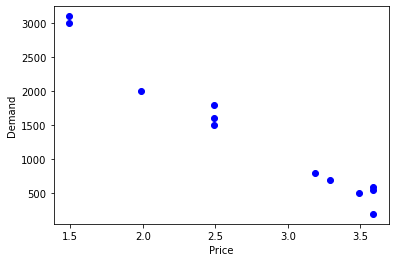

Intercept: [4668.13973953]
Coefficients: [[-1195.52974305]]
R2 0.9699890766827799


In [16]:
# Question 2
# Linear Regression
import numpy as np


y = np.array(
    [1500, 2000, 500, 600, 550, 3000, 3100, 1800, 700, 200, 1600, 800]
).reshape(12, 1)
x = np.array(
    [2.49, 1.99, 3.49, 3.59, 3.59, 1.49, 1.49, 2.49, 3.29, 3.59, 2.49, 3.19]
).reshape(12, 1)

import matplotlib.pyplot as plt

plt.plot(x, y, "bo")
plt.xlabel("Price")
plt.ylabel("Demand")
plt.show()


# Fit the linear regression model
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(x, y)

# Print the coefficients and intercept
print("Intercept:", reg.intercept_)
print("Coefficients:", reg.coef_)


from sklearn.metrics import r2_score

print("R2", r2_score(y_pred=reg.predict(x), y_true=y))

In [15]:
# Question 3
# Croston
import numpy as np
import pandas as pd
import math

# Index numbers and corresponding values
indices = np.array([0, 12, 18, 35, 47, 61])
values = np.array([0, 7, 8, 5, 3, 5])

# Create an array of zeros with a specific length
array_length = 62
demand = np.zeros(array_length)

# Assign the corresponding values to the specified indices
demand[indices] = values

# Print the resulting array
print("Demand data\n", demand)


def Croston(indices, values, alpha=0.2):

    for i in range(len(values)):
        if i == 0:
            x = np.array([14])
            a = np.array([5])
            forecast_day = np.array([14])
            forecast_quantity = np.array([5])
        else:
            x = np.append(
                x, (1 - alpha) * x[-1] + alpha * (indices[i] - indices[i - 1])
            )
            a = np.append(a, (1 - alpha) * a[-1] + alpha * (values[i]))
            forecast_day = np.append(forecast_day, math.floor(indices[i] + x[-1]))
            forecast_quantity = np.append(forecast_quantity, math.ceil(a[-1]))

    df = pd.DataFrame(
        {
            "x": x,
            "a": a,
            "forecast_day": forecast_day,
            "forecast_quantity": forecast_quantity,
        }
    )

    return df


Croston(indices=indices, values=values, alpha=0.2)

Demand data
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 7. 0. 0. 0. 0. 0. 8. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 5. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 5.]


,x,a,forecast_day,forecast_quantity
0,14.00000,5.00000,14,5
1,13.60000,5.40000,25,6
2,12.08000,5.92000,30,6
3,13.06400,5.73600,48,6
4,12.85120,5.18880,59,6
5,13.08096,5.15104,74,6


In [18]:
# Question 4
import numpy as np


# Demand
demand = np.array([55, 48, 57, 58])


# b)Exponential Smoothing
from statsmodels.tsa.api import SimpleExpSmoothing

ses_fit = SimpleExpSmoothing(
    demand, initialization_method="known", initial_level=50
).fit(smoothing_level=0.1, optimized=False)
ES_prediction = ses_fit.fittedfcast


import scipy.stats as st

S = np.ceil(ES_prediction + 15 * st.norm.ppf(0.8))

Q = np.array([])
for i in [0, 1, 2, 3]:
    Q = np.append(Q, demand[i] - S[i] + S[i + 1])

print("b) Order Quantities", Q)


# c)Exponential Smoothing
demand = Q

from statsmodels.tsa.api import SimpleExpSmoothing

ses_fit = SimpleExpSmoothing(
    demand, initialization_method="known", initial_level=50
).fit(smoothing_level=0.3, optimized=False)
ES_prediction = ses_fit.fittedfcast


import scipy.stats as st

S = np.ceil(ES_prediction + 15 * st.norm.ppf(0.8))

Q = np.array([])
for i in [0, 1, 2, 3]:
    Q = np.append(Q, demand[i] - S[i] + S[i + 1])

print("c) Order Quantities", Q)
Q.std()

b) Order Quantities [56. 47. 58. 59.]
c) Order Quantities [58. 45. 61. 61.]


6.609652033201143